In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle, copy
from collections import defaultdict
from Networkmodel import NetworkModel_org, HopField

In [2]:
class NetworkModel(NetworkModel_org):
    def task_condition(self):
        self.HFregister = dict()
        self.actdict = {1: [2], 2: [3,4], 3: [2], 4: [1]}  
        self.initial = 1
        self.terminal = [4]
        self.stmdict = {1: [1], 2: [2], 3: [3], 4:[4]}
        self.cortex_calc = [1]
        self.stmindex = {1:0, 2:0, 3:0, 4:0}
        self.swblock = 20
        for key,val in self.stmdict.items():
            for s in val:
                tmp = np.zeros(self.nstm)
                tmp[np.sort(np.random.choice(len(tmp), int(len(tmp)/2), replace = False))] = 1  
                self.HFregister[s] = tmp
                
    def check_rwd(self, result, count):
        if not result[-1]["cond"] in self.terminal:
            return 0
        swmode = np.mod(np.floor(count/self.swblock),2)
        tmp1 = sum([result[i]["infcond"] for i in range(len(result))], [])
        tmp2 = [result[i]["cond"] for i in range(len(result))]
        cnt1,cnt2 = len(np.where(np.array(tmp1)==3)[0]),len(np.where(np.array(tmp2)==3)[0])
        if count < self.swblock:
            return int(cnt1 + cnt2 == 0)
        elif count < self.swblock*2:
            return int(0 < cnt1 < 3 or 0 < cnt2 < 2) #int(cnt1 + cnt2 > 0)
        else:
            return int(2 < cnt1 or 1 < cnt2) #int(2 < cnt1 < 5 or 1 < cnt2 < 3)
        
    def check_HPC(self, lesion=False):
        HCdict = defaultdict(list)
        if not lesion:
            HF2HC = self.HF2HC.copy()
        else:
            HF2HC = self.HF2HC.copy()
            HF2HC[:,self.nstm+2:] = 0
        for key in self.HFregister.keys():
            if type(key) != str:
                continue
            HFstate = self.HFregister[key].flatten()
            prior = (np.sum(self.HC2HF > 0, 0) > 0)*(-1e-6)
            _, HC = self.get_wta(HF2HC, HFstate[self.fromHF], self.nHC, prior = prior)
            HCdict[int(HC)].append(key)
        return HCdict
            
    def lesion(self):
        HCdicta = self.check_HPC()
        HCdictb = self.check_HPC()
        HCdict2 = self.check_HPC(lesion=True)
        return HCdicta, HCdictb, HCdict2

In [3]:
allresult = dict()
x = 0

In [4]:
hp = NetworkModel(200,1000,300,1200,8)
result = []
HCprev = []
cond = None
for i in range(80):
    result_,HCprev,cond = hp.process(i, HCprev, cond, verbose = True)
    result.append(result_)
#allresult[x] = result
x += 1

trial 0 stmindex 0 HCprev []
HCprev []
think 0-0 [31]
plan 1 [] 2
init 1 2
memo 1 0
HF2HC [248] 1-0
HC2HF [248] 1-0
pkup [248] 1-0
choose [1. 2.] [248 125]
HF2HC [248] 1-0
HC2HF [248] 1-0
HCprev [array([125], dtype=int64)]
think 0-0 [167]
plan 2 [] 3
init 2 3
memo 2 0
HF2HC [225] 2-0
HC2HF [225] 2-0
pkup [225] 2-0
choose [2. 3.] [225 185]
HC2HF [125] 2-0
HF2HC [225] 2-0
HC2HF [225] 2-0
HCprev [array([185], dtype=int64)]
think 0-0 [111]
plan 3 [] 2
init 3 2
memo 3 0
HF2HC [90] 3-0
HC2HF [90] 3-0
pkup [90] 3-0
choose [3. 2.] [ 90 136]
HC2HF [185] 3-0
HF2HC [90] 3-0
HC2HF [90] 3-0
HCprev [array([136], dtype=int64)]
think 0-0 [113]
plan 2 [] 4
init 2 4
memo 2 1
HF2HC [169] 2-1
HC2HF [169] 2-1
pkup [169] 2-1
choose [2. 4.] [169  13]
HC2HF [136] 2-1
HF2HC [169] 2-1
HC2HF [169] 2-1
HCprev [array([13], dtype=int64)]
think 0-0 [255]
plan 4 [] 1
init 4 1
memo 4 0
HF2HC [232] 4-0
HC2HF [232] 4-0
pkup [232] 4-0
choose [4. 1.] [232   9]
HC2HF [13] 4-0
HF2HC [232] 4-0
HC2HF [232] 4-0
check trans [4.

choose [1. 2.] [248 125]
HC2HF [9] 1-0
HF2HC [248] 1-0
HC2HF [248] 1-0
HCprev [array([248], dtype=int64), array([125], dtype=int64)]
think 2-0 [225]
choose [2. 3.] [225 185]
HC2HF [125] 2-0
HF2HC [225] 2-0
HC2HF [225] 2-0
HCprev [array([225], dtype=int64), array([185], dtype=int64)]
think 3-0 [90]
choose [3. 2.] [ 90 136]
HC2HF [185] 3-0
HF2HC [90] 3-0
HC2HF [90] 3-0
HCprev [array([90], dtype=int64), array([136], dtype=int64)]
think 2-1 [169]
choose [2. 4.] [169  13]
HC2HF [136] 2-1
HF2HC [169] 2-1
HC2HF [169] 2-1
HCprev [array([169], dtype=int64), array([13], dtype=int64)]
think 4-0 [232]
choose [4. 1.] [232   9]
HC2HF [13] 4-0
HF2HC [232] 4-0
HC2HF [232] 4-0
check trans [1.0, 2.0, 4.0, 1.0] {}
['c:1', 'n:2.0', 'e:0.0', 'i:[1.0, 2.0]', 'c:[0.0, 0.0]', 'p:[1.0, 2.0]', 'H:[  9 248 125]', 'a:1-0', 'r:0']
['c:2', 'n:3.0', 'e:0.0', 'i:[2.0, 3.0]', 'c:[0.0, 0.0]', 'p:[2.0, 3.0]', 'H:[248 125 225 185]', 'a:2-0', 'r:0']
['c:3', 'n:2.0', 'e:0.0', 'i:[3.0, 2.0]', 'c:[0.0, 1.0]', 'p:[3.0, 2.0]',

choose [1. 2. 3.] [248 125 225 185]
HC2HF [188] 1-0
HF2HC [248] 1-0
HC2HF [248] 1-0
HCprev [array([248], dtype=int64), array([125], dtype=int64), array([225], dtype=int64), array([185], dtype=int64)]
think 3-0 [90]
choose [3. 2.] [ 90 136]
HC2HF [185] 3-0
HF2HC [90] 3-0
HC2HF [90] 3-0
HCprev [array([90], dtype=int64), array([136], dtype=int64)]
think 2-1 [169]
choose [2. 4.] [169  13]
HC2HF [136] 2-1
HF2HC [169] 2-1
HC2HF [169] 2-1
HCprev [array([169], dtype=int64), array([13], dtype=int64)]
think 4-0 [232]
choose [4. 1.] [232   9]
HC2HF [13] 4-0
HF2HC [232] 4-0
HC2HF [232] 4-0
check trans [1.0, 4.0, 1.0] {(4.0, 2.0): 1.0}
['c:1', 'n:3.0', 'e:0.0', 'i:[1.0, 2.0, 3.0]', 'c:[0.0, 0.0, 0.0]', 'p:[1.0, 2.0, 3.0]', 'H:[188 248 125 225 185]', 'a:1-0', 'r:0']
['c:3', 'n:2.0', 'e:0.0', 'i:[3.0, 2.0]', 'c:[0.0, 1.0]', 'p:[3.0, 2.0]', 'H:[248 125 225 185  90 136]', 'a:3-0', 'r:0']
['c:2', 'n:4.0', 'e:0.0', 'i:[2.0, 4.0]', 'c:[1.0, 0.0]', 'p:[2.0, 4.0]', 'H:[ 90 136 169  13]', 'a:2-1', 'r:0']
['c

choose [1. 2. 3. 2. 4.] [248 125 225 185  90 136 169  13 232   9]
HC2HF [9] 1-0
HF2HC [248] 1-0
HC2HF [248] 1-0
tested ['4.0-2', '4.0-0', '2.0-0', '3.0-0', '1.0-0', '2.0-1']
check trans [1.0, 2.0, 3.0, 2.0, 4.0, 1.0] {(4.0, 2.0): 1.0}
['c:1', 'n:4.0', 'e:0.8790945064342538', 'i:[1.0, 2.0, 3.0, 2.0, 4.0]', 'c:[0.0, 0.0, 0.0, 1.0, 0.0]', 'p:[1.0, 2.0, 3.0, 2.0, 4.0]', 'H:[  9 248 125 225 185  90 136 169  13 232   9]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.8790945064342538', 'i:[1.0, 2.0, 3.0, 2.0, 4.0]', 'c:[0.0, 0.0, 0.0, 1.0, 0.0]', 'p:[1.0, 2.0, 3.0, 2.0, 4.0]', 'H:[  9 248 125 225 185  90 136 169  13 232   9]', 'a:4-0', 'r:1', "p:['1-0', '2-0', '3-0', '2-1', '4-0', '3-1', '2-2', '4-1', '4-2']"]

trial 35 stmindex 0 HCprev 9
HCprev [array([9], dtype=int64)]
think 1-0 [248]
choose [1. 2. 3. 2. 4.] [248 125 225 185  90 136 169  13 232   9]
HC2HF [9] 1-0
HF2HC [248] 1-0
HC2HF [248] 1-0
tested ['4.0-2', '4.0-0', '2.0-0', '3.0-0', '1.0-0', '2.0-1']
check trans [1.0, 2.0, 3.0, 2.0, 4.0, 1.0] 

external stm 1
think 1-0 [248]
external stm 1
think 1-0 [248]
external stm 1
think 1-0 [248]
external stm 1
think 1-0 [248]
external stm 1
think 1-0 [248]
choose [1. 2. 3. 2. 3.] [248 125 225 185  90 136 169 278]
HC2HF [135] 1-0
HF2HC [248] 1-0
HC2HF [248] 1-0
HCprev [array([248], dtype=int64), array([125], dtype=int64), array([225], dtype=int64), array([185], dtype=int64), array([90], dtype=int64), array([136], dtype=int64), array([169], dtype=int64), array([278], dtype=int64)]
think 3-1 [182]
choose [3. 2.] [182 270]
HC2HF [278] 3-1
HF2HC [182] 3-1
HC2HF [182] 3-1
HCprev [array([182], dtype=int64), array([270], dtype=int64)]
think 2-2 [163]
choose [2. 4.] [163 156]
HC2HF [270] 2-2
HF2HC [163] 2-2
HC2HF [163] 2-2
HCprev [array([163], dtype=int64), array([156], dtype=int64)]
think 4-1 [72]
choose [4. 1.] [ 72 228]
HC2HF [156] 4-1
HF2HC [72] 4-1
HC2HF [72] 4-1
check trans [1.0, 4.0, 1.0] {(4.0, 0.0): 1.49, (4.0, 2.0): 1.043}
['c:1', 'n:3.0', 'e:0.0', 'i:[1.0, 2.0, 3.0, 2.0, 3.0]', 'c:[0

choose [1. 2. 3. 2. 3. 2. 4.] [248 125 225 185  90 136 169 278 182 270 163 156  72 228]
HC2HF [9] 1-0
HF2HC [248] 1-0
HC2HF [248] 1-0
check trans [1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0, 1.0] {(4.0, 0.0): 1.7300999999999997, (4.0, 2.0): 1.2110699999999996}
['c:1', 'n:4.0', 'e:0.67942291171875', 'i:[1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0]', 'c:[0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 1.0]', 'p:[1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0]', 'H:[  9 248 125 225 185  90 136 169 278 182 270 163 156  72 228]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.67942291171875', 'i:[1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0]', 'c:[0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 1.0]', 'p:[1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0]', 'H:[  9 248 125 225 185  90 136 169 278 182 270 163 156  72 228]', 'a:4-1', 'r:1', "p:['1-0', '2-0', '3-0', '2-1', '4-0', '3-1', '2-2', '4-1', '4-2', '3-2', '2-3', '4-3']"]

trial 54 stmindex 0 HCprev 228
HCprev [array([228], dtype=int64)]
think 1-0 [248]
choose [1. 2. 3. 2. 3. 2. 4.] [248 125 225 185  90 136 169 278 182 270 163 156  72 228]

choose [1. 2. 3. 2. 4.] [248 125 225 185  90 136 169  13 232   9]
HC2HF [228] 1-0
HF2HC [248] 1-0
HC2HF [248] 1-0
set NG [4. 0.] {(4.0, 0.0): 1.8477489999999999, (4.0, 2.0): 1.2934242999999999}
check trans [1.0, 2.0, 3.0, 2.0, 4.0, 1.0] {(4.0, 0.0): 1.8477489999999999, (4.0, 2.0): 1.2934242999999999}
['c:1', 'n:4.0', 'e:0.5861212387914385', 'i:[1.0, 2.0, 3.0, 2.0, 4.0]', 'c:[0.0, 0.0, 0.0, 1.0, 0.0]', 'p:[1.0, 2.0, 3.0, 2.0, 4.0]', 'H:[228 248 125 225 185  90 136 169  13 232   9]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.5861212387914385', 'i:[1.0, 2.0, 3.0, 2.0, 4.0]', 'c:[0.0, 0.0, 0.0, 1.0, 0.0]', 'p:[1.0, 2.0, 3.0, 2.0, 4.0]', 'H:[228 248 125 225 185  90 136 169  13 232   9]', 'a:4-0', 'r:0', "p:['1-0', '2-0', '3-0', '2-1', '4-0', '3-1', '2-2', '4-1', '4-2', '3-2', '2-3', '4-3']"]

trial 65 stmindex 0 HCprev 9
HCprev [array([9], dtype=int64)]
think 1-0 [248]
choose [1. 2. 3. 2. 3. 2. 4.] [248 125 225 185  90 136 169 278 182 270 163 156  72 228]
HC2HF [9] 1-0
HF2HC [248] 1-0
HC2HF [248]

think 1-0 [248]
choose [1. 2. 3. 2. 3. 2. 4.] [248 125 225 185  90 136 169 278 182 270 163 156  72 228]
HC2HF [9] 1-0
HF2HC [248] 1-0
HC2HF [248] 1-0
tested ['4.0-2', '3.0-1', '4.0-0', '2.0-2', '2.0-0', '3.0-0', '4.0-1', '1.0-0', '2.0-1']
check trans [1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0, 1.0] {(4.0, 0.0): 1.9336445348999998, (4.0, 2.0): 1.3535511744299997}
['c:1', 'n:4.0', 'e:0.9612404689154856', 'i:[1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0]', 'c:[0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 1.0]', 'p:[1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0]', 'H:[  9 248 125 225 185  90 136 169 278 182 270 163 156  72 228]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.9612404689154856', 'i:[1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0]', 'c:[0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 1.0]', 'p:[1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0]', 'H:[  9 248 125 225 185  90 136 169 278 182 270 163 156  72 228]', 'a:4-1', 'r:1', "p:['1-0', '2-0', '3-0', '2-1', '4-0', '3-1', '2-2', '4-1', '4-2', '3-2', '2-3', '4-3']"]

trial 74 stmindex 0 HCprev 228
HCprev [array([228], dtype=in

In [29]:
num = 40
trialnum = 80
allresult = dict() #np.zeros((num,trialnum))*np.nan
lesionresult = dict() #np.zeros((num,trialnum))*np.nan
x = 0
errcounter = 0
while x < num:
    print(x)
    hp = NetworkModel(200,1000,300,1200,8)
    result = []
    HCprev = []
    cond = None
    try:
        for i in range(trialnum):
            result_,HCprev,cond = hp.process(i, HCprev, cond,verbose = False)
            result.append(result_)
        #HCdict, HCdict2 = hp.lesion()
        lesionresult[x] = hp.lesion()
        allresult[x] = result
    except:
        print("error",x)
        allresult[x] = result
        errcounter += 1
    x += 1
print(errcounter)

0
init 1 2
init 2 4
init 4 1
set NG [4. 0.] {(4.0, 0.0): 1.0}
actremapping [ 63  53 230 135] [ 63  53 230 107]
init 3 2
init 2 4
init 4 1
set NG [4. 1.] {(4.0, 0.0): 0.7, (4.0, 1.0): 1.0}
set NG [4. 0.] {(4.0, 0.0): 1.49, (4.0, 1.0): 0.7}
set NG [4. 1.] {(4.0, 0.0): 1.043, (4.0, 1.0): 1.49}
actremapping [169 250] [169  97]
init 3 2
init 2 4
init 4 1
1
init 1 2
init 2 3
init 3 2
init 2 4
init 4 1
actremapping [139  64] [139 286]
init 3 2
init 2 4
init 4 1
actremapping [ 65 289] [ 65 234]
init 3 2
init 2 4
init 4 1
actremapping [246  81] [246  31]
init 4 1
set NG [4. 3.] {(4.0, 3.0): 1.0}
set NG [4. 0.] {(4.0, 0.0): 1.0, (4.0, 3.0): 0.7}
set NG [4. 3.] {(4.0, 0.0): 0.7, (4.0, 3.0): 1.49}
set NG [4. 0.] {(4.0, 0.0): 1.49, (4.0, 3.0): 1.043}
set NG [4. 3.] {(4.0, 0.0): 1.043, (4.0, 3.0): 1.7300999999999997}
set NG [4. 0.] {(4.0, 0.0): 1.7300999999999997, (4.0, 3.0): 1.2110699999999996}
set NG [4. 3.] {(4.0, 0.0): 1.2110699999999996, (4.0, 3.0): 1.8477489999999999}
set NG [4. 0.] {(4.0, 0.0

set NG [4. 0.] {(4.0, 0.0): 1.7300999999999997, (4.0, 1.0): 1.043}
set NG [4. 1.] {(4.0, 0.0): 1.2110699999999996, (4.0, 1.0): 1.7300999999999997}
set NG [4. 0.] {(4.0, 0.0): 1.8477489999999999, (4.0, 1.0): 1.2110699999999996}
9
init 1 2
init 2 4
init 4 1
set NG [4. 0.] {(4.0, 0.0): 1.0}
actremapping [242 227 248 236] [242 227 248 102]
init 3 2
init 2 4
init 4 1
set NG [4. 1.] {(4.0, 0.0): 0.7, (4.0, 1.0): 1.0}
set NG [4. 0.] {(4.0, 0.0): 1.49, (4.0, 1.0): 0.7}
set NG [4. 1.] {(4.0, 0.0): 1.043, (4.0, 1.0): 1.49}
actremapping [242 227 248 102 218 113 244 188] [242 227 248 102 218 113 244 175]
init 3 2
init 2 4
init 4 1
set NG [4. 0.] {(4.0, 0.0): 1.7300999999999997, (4.0, 1.0): 1.043}
set NG [4. 1.] {(4.0, 0.0): 1.2110699999999996, (4.0, 1.0): 1.7300999999999997}
set NG [4. 0.] {(4.0, 0.0): 1.8477489999999999, (4.0, 1.0): 1.2110699999999996}
set NG [4. 1.] {(4.0, 0.0): 1.2934242999999999, (4.0, 1.0): 1.8477489999999999}
set NG [4. 0.] {(4.0, 0.0): 1.9053970099999997, (4.0, 1.0): 1.2934

init 2 4
init 4 1
actremapping [ 91 146] [ 91 172]
init 4 1
set NG [4. 2.] {(4.0, 2.0): 1.0}
actremapping [  5 116] [  5 163]
init 3 2
init 2 4
init 4 1
set NG [4. 0.] {(4.0, 0.0): 1.0, (4.0, 2.0): 0.7}
set NG [4. 2.] {(4.0, 0.0): 0.7, (4.0, 2.0): 1.49}
set NG [4. 0.] {(4.0, 0.0): 1.49, (4.0, 2.0): 1.043}
set NG [4. 2.] {(4.0, 0.0): 1.043, (4.0, 2.0): 1.7300999999999997}
set NG [4. 0.] {(4.0, 0.0): 1.7300999999999997, (4.0, 2.0): 1.2110699999999996}
set NG [4. 2.] {(4.0, 0.0): 1.2110699999999996, (4.0, 2.0): 1.8477489999999999}
set NG [4. 0.] {(4.0, 0.0): 1.8477489999999999, (4.0, 2.0): 1.2934242999999999}
set NG [4. 2.] {(4.0, 0.0): 1.2934242999999999, (4.0, 2.0): 1.9053970099999997}
set NG [4. 0.] {(4.0, 0.0): 1.9053970099999997, (4.0, 2.0): 1.3337779069999998}
set NG [4. 2.] {(4.0, 0.0): 1.3337779069999998, (4.0, 2.0): 1.9336445348999998}
18
init 1 2
init 2 4
init 4 1
set NG [4. 0.] {(4.0, 0.0): 1.0}
actremapping [ 21  18  92 234] [ 21  18  92 238]
init 3 2
init 2 4
init 4 1
set NG 

set NG [4. 5.] {(4.0, 1.0): 1.0628079069999998, (4.0, 4.0): 0.6652970099999999, (4.0, 5.0): 1.51107}
set NG [4. 1.] {(4.0, 1.0): 1.7439655348999998, (4.0, 4.0): 0.46570790699999987, (4.0, 5.0): 1.0577489999999998}
set NG [4. 5.] {(4.0, 1.0): 1.22077587443, (4.0, 5.0): 1.7404243}
set NG [4. 4.] {(4.0, 1.0): 0.8545431121009999, (4.0, 4.0): 1.0, (4.0, 5.0): 1.21829701}
set NG [4. 1.] {(4.0, 1.0): 1.5981801784706997, (4.0, 5.0): 0.8528079069999999}
set NG [4. 4.] {(4.0, 1.0): 1.1187261249294898, (4.0, 4.0): 1.0, (4.0, 5.0): 0.5969655348999998}
set NG [4. 5.] {(4.0, 1.0): 0.7831082874506428, (4.0, 4.0): 0.7, (4.0, 5.0): 1.41787587443}
27
init 1 2
init 2 4
init 4 1
set NG [4. 0.] {(4.0, 0.0): 1.0}
actremapping [162  19 287 233] [162  19 287 163]
init 3 2
init 2 4
init 4 1
set NG [4. 1.] {(4.0, 0.0): 0.7, (4.0, 1.0): 1.0}
set NG [4. 0.] {(4.0, 0.0): 1.49, (4.0, 1.0): 0.7}
set NG [4. 1.] {(4.0, 0.0): 1.043, (4.0, 1.0): 1.49}
set NG [4. 0.] {(4.0, 0.0): 1.7300999999999997, (4.0, 1.0): 1.043}
ac

init 3 2
init 2 4
init 4 1
set NG [4. 1.] {(4.0, 0.0): 1.043, (4.0, 1.0): 1.7300999999999997}
set NG [4. 0.] {(4.0, 0.0): 1.7300999999999997, (4.0, 1.0): 1.2110699999999996}
34
init 1 2
init 2 4
init 4 1
set NG [4. 0.] {(4.0, 0.0): 1.0}
actremapping [ 12 196 100 162] [ 12 196 100  24]
init 3 2
init 2 4
init 4 1
set NG [4. 1.] {(4.0, 0.0): 0.7, (4.0, 1.0): 1.0}
set NG [4. 0.] {(4.0, 0.0): 1.49, (4.0, 1.0): 0.7}
set NG [4. 1.] {(4.0, 0.0): 1.043, (4.0, 1.0): 1.49}
actremapping [ 12 196 100  24 195 290  70 132] [ 12 196 100  24 195 290  70  44]
init 3 2
init 2 4
init 4 1
set NG [4. 0.] {(4.0, 0.0): 1.7300999999999997, (4.0, 1.0): 1.043}
set NG [4. 1.] {(4.0, 0.0): 1.2110699999999996, (4.0, 1.0): 1.7300999999999997}
set NG [4. 0.] {(4.0, 0.0): 1.8477489999999999, (4.0, 1.0): 1.2110699999999996}
set NG [4. 1.] {(4.0, 0.0): 1.2934242999999999, (4.0, 1.0): 1.8477489999999999}
set NG [4. 0.] {(4.0, 0.0): 1.9053970099999997, (4.0, 1.0): 1.2934242999999999}
35
init 1 2
init 2 3
init 3 2
init 2 4

with open("./pkls/dropby_2times_lesion.pkl", mode = "wb") as f:
    pickle.dump(allresult, f)
    pickle.dump(lesionresult, f)

In [5]:
with open("./pkls/dropby_2times_lesion.pkl", mode = "rb") as f:
    allresult = pickle.load(f)
    lesionresult = pickle.load(f)
num = len(allresult)
trialnum = np.max([len(allresult[x]) for x in range(num)])

In [70]:
rwdrate = np.zeros((num,trialnum))
for x in range(num):
    tmp = [res[-1]["rwd"] for r, res in enumerate(allresult[x])]
    rwdrate[x,:len(tmp)] = tmp

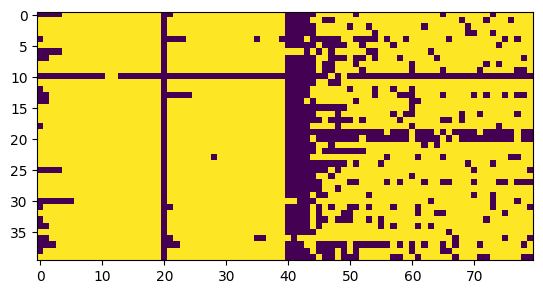

In [71]:
plt.imshow(rwdrate)

In [ ]:
plt.figure(figsize = (10,4))
for i in range(1,int(trialnum/hp.swblock)-1):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [-5,105], "--",color = "#555555")
plt.errorbar(np.arange(trialnum), np.nanmean(rwdrate,0)*100, 100*np.nanstd(rwdrate,0)/np.sqrt(num),fmt="go-")
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("correct [%]", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,20),np.arange(0,trialnum+1,20), fontsize = 15)
plt.yticks(fontsize = 15) 
plt.ylim([-5,105])
plt.savefig("./figure/dropby_2times_correct.png", bbox_inches = "tight")

In [ ]:
inflen = np.zeros((num,trialnum))*np.nan
for x in range(num):
    tmp = [int((len(allresult[x][r][-1]["HCtrans"])-1)/2) for r in range(len(allresult[x]))]
    inflen[x,:len(tmp)] = tmp

In [ ]:
plt.figure(figsize = (10,4))
for i in range(1,int(trialnum/hp.swblock)-1):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [0,8], "--",color = "#555555")
for i in range(num):
    plt.plot(np.arange(trialnum), inflen[i,:]+np.random.rand(trialnum)*0, "ko-", linewidth = 0.3, markerfacecolor = (0,0,0,0.05))    
plt.plot(np.arange(trialnum), np.nanmean(inflen,0), "r")
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("planning length", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,20), np.arange(0,trialnum + 1,20), fontsize = 15)
plt.yticks(np.arange(1,8,2),fontsize = 15)
plt.ylim([.5,8])
plt.savefig("./figure/dropby_2times_inflen.png", bbox_inches = "tight")

In [ ]:
for x in range(2):
    allHCs, allinfs = [], []
    if len(allresult[x]) != trialnum:
        continue
    for y in range(trialnum):
        HCs = []
        for z in range(len(allresult[x][y])):
            tmp = copy.deepcopy(allresult[x][y][z]["HCtrans"])
            if len(tmp) % 2 == 1:
                tmp = tmp[1:]
            arg = np.isin(tmp, HCs)
            HCs.extend(list(tmp[~arg]))
            tmp = allresult[x][y][z]["infcond"]
            if z == 0:
                infs = copy.deepcopy(tmp)
            elif infs[-1] == tmp[0]:
                infs.extend(tmp[1:])
            elif infs[-1] == tmp[-1]:
                continue
            else:
                print(x,y,z,tmp, infs, len(HCs))
        if HCs[0] == HCs[-1]:
            HCs = HCs[:-1]
        if infs[0] == infs[-1]:
            infs = infs[:-1]
        HCs = HCs[:len(infs)*2]
        allHCs.append(HCs)
        allinfs.append(infs)

In [ ]:
mat = np.zeros((2*7, 7))
for i in range(7):
    mat[2*i:2*i+2,i] = 1

In [ ]:
plt.figure(figsize = (4,8))
plt.imshow(mat, cmap = "jet")
plt.plot(np.ones(2)*0.5,[-0.5,13.5], color = "#D648D6")
plt.plot(np.ones(2)*3,[-0.5,13.5], color = "#D648D6")
plt.plot(np.ones(2)*5.5,[-0.5,13.5], color = "#D648D6")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.savefig("./figure/dropby_2times_firing.png", bbox_inches = "tight")

In [12]:
def get_crr(HCdict1, HCdict2, keys):
    summary, summary2 = [], []
    for u, v in HCdict1.items():
        if np.sum(np.isin(v,keys))==0:
            continue
        x = np.array([1 if k in v else np.random.rand()*0.1 for k in keys])
        v2 = HCdict2[u] if u in HCdict2 else []
        x2 = np.array([1 if k in v2 else np.random.rand()*0.1 for k in keys])
        crr, crr2 = [], []
        tmp = np.corrcoef(x,x2)
        crr.append(tmp[0,1])
        y = (x[:2] + x[2:])/2
        y2 = (x2[:2] + x2[2:])/2
        tmp2 = np.corrcoef(y,y2)
        crr2.append(tmp2[0,1])
    return crr, crr2

In [13]:
summary, spsummary = [], []
summary2, spsummary2 = [], []
for j in range(len(lesionresult)):
    HCdicta, HCdictb, HCdict2 = lesionresult[j]
    result = allresult[j]
    for i in range(5):
        if result[-i][-1]["infcond"][:6] == [1,2,3,2,3,2]:
            keys = ["{}-{}".format(int(result[-i][-1]["infcond"][k]),int(result[-i][-1]["context"][k])) \
                    for k in range(2,6)]
            crrs, spcrrs = get_crr(HCdicta, HCdictb, keys)
            crrs2, spcrrs2 = get_crr(HCdicta, HCdict2, keys)
            summary.extend(crrs)
            spsummary.extend(spcrrs)
            summary2.extend(crrs2)
            spsummary2.extend(spcrrs2)
            print(i, "complete")
            break

1 complete
1 complete
3 complete
1 complete
1 complete
2 complete
1 complete
2 complete
1 complete
1 complete
2 complete
1 complete
1 complete
1 complete
1 complete
1 complete
1 complete
1 complete
1 complete
1 complete
2 complete
1 complete
1 complete
1 complete
1 complete
1 complete
2 complete
1 complete
1 complete
1 complete
2 complete
1 complete
1 complete
1 complete
1 complete
2 complete
1 complete


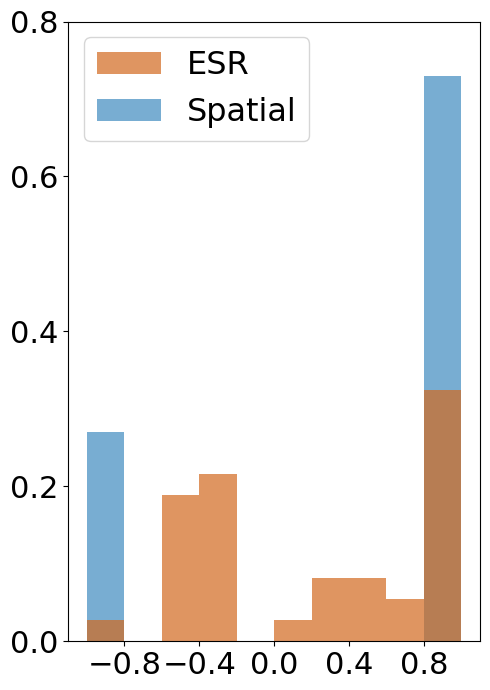

In [20]:
fig,ax=plt.subplots(1,1,figsize=(5,7),layout='tight')

h1 = plt.hist(np.array(spsummary2),10,[-1,1],weights = np.ones(len(spsummary2))/len(spsummary2),\
         alpha=0.6,label="Spatial")
h2 = plt.hist(np.array(summary2),10,[-1,1],weights = np.ones(len(summary2))/len(summary2),
         color="#d2691e",alpha=0.7,label="ESR")
plt.yticks(np.arange(0,1.2,0.2),fontsize=22)
plt.xticks(np.arange(-0.8,1,0.4),fontsize=22)
plt.ylim([0,0.8])
handles, labels = ax.get_legend_handles_labels()# 凡例の情報を取得
plt.legend(handles=handles[::-1],labels=labels[::-1], loc="upper left", fontsize = 23)
plt.savefig("./figure/Spatial_inh.png", bbox_inches = "tight")